In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.compat.v1.disable_eager_execution()

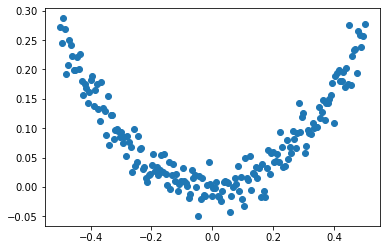

In [6]:
#生成200个随机点
x_data=np.linspace(-0.5,0.5,200)[:,np.newaxis]#从-0.5到0.5生成200个随机数，后面为给这200个数据加上维度，成为200x1的列向量
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data)+noise #平方加噪声
plt.scatter(x_data,y_data)
plt.show()

In [7]:
print(x_data.shape)
x = tf.compat.v1.placeholder(tf.float32,[None,1])#输入，Nx1的数据
print(x.shape)

(200, 1)
(None, 1)


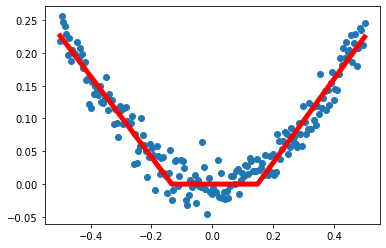

In [17]:
#构建神经网络 拟合非线性分布
x = tf.compat.v1.placeholder(tf.float32,[None,1])#输入，Nx1的数据
y = tf.compat.v1.placeholder(tf.float32,[None,1])#标签，Nx1的数据

#神经网络结构 1-20-1 

w1 = tf.Variable(tf.random.normal([1,20]))#初始化权值矩阵,初始化为随机值，输入层到隐藏层
#偏置
b1 = tf.Variable(tf.zeros([20]))#初始化为常数 为0 或者 0.1

wx_plus_b_1 = tf.matmul(x,w1) + b1

#定义激活函数

# l1 = tf.nn.tanh(wx_plus_b_1)
l1 = tf.nn.relu(wx_plus_b_1)

w2 = tf.Variable(tf.random.normal([20,1]))#这些会是需要调节的变量
b2 = tf.Variable(tf.zeros([1]))
wx_plus_b_2 = tf.matmul(l1,w2) + b2

# prediction = tf.nn.tanh(wx_plus_b_2)
prediction = tf.nn.relu(wx_plus_b_2)
#定义二次代价函数
# loss = tf.losses.mean_squared_error(y,prediction)#这里是注意点，如果用这个结果会是一条直线
loss = tf.compat.v1.losses.mean_squared_error(y,prediction)
#使用梯度下降法 最小化loss
train = tf.compat.v1.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    for _ in range(3000):
        sess.run(train,feed_dict = {x:x_data,y:y_data})#这里才是真正的计算
        
    #获取预测值 进行比较
    prediction_value = sess.run(prediction,feed_dict = {x:x_data})
    #画图
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw = 5)
    plt.show()


In [ ]:
这里的激活函数如果为relu函数，效果不太好，对于简单的数据和模型 relu效果可能不会太好
relu函数比较适合 复杂的数据和模型，比如网络层数比较多的时候，效果会比较好